[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\muhammedazhar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model accuracy: 0.9356408869659275
Prediction for new document: ['biographies']


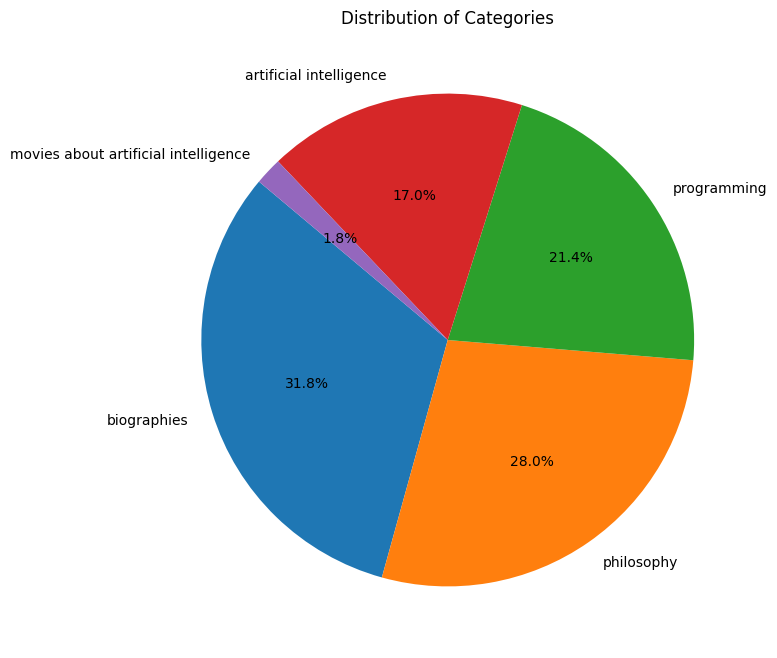

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import pickle

# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Loading and Preprocessing the Dataset
df = pd.read_csv('dataset.csv', usecols=['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words', 'last_editor_gender', 'category'])
df = df.dropna()
df['category'] = df['category'].str.lower()
df = df[df['has_entity'] != 'data missing']

# Function to Clean Text Data
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_paragraph'] = df['paragraph'].apply(clean_text)
df['tokenized_paragraph'] = df['cleaned_paragraph'].apply(lambda x: nltk.word_tokenize(x))

# Splitting 'has_entity' into Binary Columns
df['ORG'] = df['has_entity'].str.contains('ORG_YES').astype(int)
df['PRODUCT'] = df['has_entity'].str.contains('PRODUCT_YES').astype(int)
df['PERSON'] = df['has_entity'].str.contains('PERSON_YES').astype(int)

# Preparing Data for Modeling
X = df['cleaned_paragraph']
y = df['category']
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)

# Building the Text Classification Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB(alpha=.01)),
])

# Training the Model
text_clf.fit(X_train, y_train)

# Evaluation
predicted = text_clf.predict(X_test)
print("Model accuracy:", np.mean(predicted == y_test))

# Saving the Model
with open('model.pkl', 'wb') as f:
    pickle.dump(text_clf, f)

# Loading the Model for Prediction
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

docs_new = ['He went on to win the Royal Medal of the Royal Society in 1971 and the Copley Medal in 1979.']
predicted = loaded_model.predict(docs_new)
print("Prediction for new document:", encoder.inverse_transform(predicted))

# Visualizing Category Distribution
plt.figure(figsize=(8, 8))
category_counts = df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.show()

This section imports all the necessary libraries used throughout the notebook. This includes `numpy` and `pandas` for data manipulation, `matplotlib` and `nltk` for data visualization and natural language processing, respectively, and several components from `sklearn` for building and evaluating the machine learning model.


Here, we download essential resources from the NLTK library, which are required for text processing, including tokenization and stop word removal.

In this block, we load the dataset from a CSV file into a pandas DataFrame. We then perform initial preprocessing steps such as dropping missing values, converting the `category` column to lowercase, and filtering out rows where `has_entity` is marked as 'data missing'.

This function, `clean_text`, is defined to clean the paragraph text in the dataset. It removes punctuation, numbers, and extra whitespaces, preparing the text for further processing and analysis.

This function, `clean_text`, is defined to clean the paragraph text in the dataset. It removes punctuation, numbers, and extra whitespaces, preparing the text for further processing and analysis.

A pipeline is constructed to streamline the text classification process. It includes steps for vectorizing the text, transforming it with TF-IDF, and classifying using a Multinomial Naive Bayes model.

The text classification pipeline is trained on the training data. This step involves learning to predict the category based on the features extracted from the text.

After training, the model's accuracy is evaluated on the test set. This gives us an indication of how well our model performs on unseen data.

The trained model is serialized and saved to a file using the pickle module. This allows us to load and use the model later without retraining.

Here, we demonstrate how to load the previously saved model from a file and use it to make predictions on new, unseen text.

The final code block creates a pie chart to visualize the distribution of categories within the dataset. This helps in understanding the balance or imbalance among different categories.